# Course 5. Python Project for Data Science

## Web Scraping:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Introduction:
#### What is Webscraping?
* **Webscraping**, is a process that can be used to automatically extract information from a website
* **Webscraping** can be easily accomplished within a matter of minuites and not hours.

#### APIs used for Webscraping:
* **Requests**


* **Beautiful Soup**

In [34]:
from bs4 import BeautifulSoup
html = '<!DOCTYPE html><html><head> <title> Page Title <\title><\head><body><h3> Hossam Al-Helaly <\h3><p> Salary: $14,000 <\p><h3> Ahmed A. ElNaby <\h3><p> Salary: $30,000 <\p><\body><\html>'
table = BeautifulSoup(html)
table.body

<body><h3> Hossam Al-Helaly &lt;\h3&gt;</h3><p> Salary: $14,000 &lt;\p&gt;</p><h3> Ahmed A. ElNaby &lt;\h3&gt;</h3><p> Salary: $30,000 &lt;\p&gt;&lt;ody&gt;&lt;\html&gt;</p></body>

In [51]:
print(table.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   Page Title &lt;	itle&gt;&lt;\head&gt;
  </title>
 </head>
 <body>
  <h3>
   Hossam Al-Helaly &lt;\h3&gt;
  </h3>
  <p>
   Salary: $14,000 &lt;\p&gt;
  </p>
  <h3>
   Ahmed A. ElNaby &lt;\h3&gt;
  </h3>
  <p>
   Salary: $30,000 &lt;\p&gt;&lt;ody&gt;&lt;\html&gt;
  </p>
 </body>
</html>


In [36]:
table.h3

<h3> Hossam Al-Helaly &lt;\h3&gt;</h3>

In [37]:
table.p

<p> Salary: $14,000 &lt;\p&gt;</p>

In [38]:
table.p.next_sibling

<h3> Ahmed A. ElNaby &lt;\h3&gt;</h3>

In [39]:
table.find_all(name = 'tr')

[]

In [40]:
import requests
from bs4 import BeautifulSoup
page = requests.get('https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings').text

In [41]:
soup = BeautifulSoup(page, 'html.parser')

In [44]:
questions = soup.find_all('q')
for question in questions:
    names = question.contents[0]
    fullLink = question.get('href')
    print(names)
    print(fullLink)

In [50]:
print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE html>

<html class="html__responsive" itemscope="" itemtype="https://schema.org/QAPage" lang="en">
<head>
<title>How to disable Python warnings? - Stack Overflow</title>
<link href="https://cdn.sstatic.net/Sites/stackoverflow/Img/favicon.ico?v=ec617d715196" rel="shortcut icon"/>
<link href="https://cdn.sstatic.net/Sites/stackoverflow/Img/apple-touch-icon.png?v=c78bd457575a" rel="apple-touch-icon"/>
<link href="https://cdn.sstatic.net/Sites/stackoverflow/Img/apple-touch-icon.png?v=c78bd457575a" rel="image_src"/>
<link href="/opensearch.xml" rel="search" title="Stack Overflow" type="application/opensearchdescription+xml"/>
<link href="https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings" rel="canonical">
<meta content="width=device-width, height=device-height, initial-scale=1.0, minimum-scale=1.0" name="viewport"/>
<meta content="website" property="og:type">
<meta content="https://stackoverflow.com/questions/14463277/how-to-d

In [62]:
tag_object = soup.title
print('tag object: ', tag_object)

tag object:  <title>How to disable Python warnings? - Stack Overflow</title>


In [63]:
print('type of tag object: ', type(tag_object))

type of tag object:  <class 'bs4.element.Tag'>


In [64]:
tag_child = tag_object.b
tag_child

In [65]:
parent_tag = tag_child.parent
parent_tag

AttributeError: 'NoneType' object has no attribute 'parent'

In [66]:
sibling_1 = tag_object.next_sibling
sibling_1

'\n'

<details> <summary> Click here for the solution  </summary>
```
sibling = tag_object.next_sibling
```
<\details>

In [68]:
tag_object['id']

KeyError: 'id'

In [69]:
%%html
<table>
  <tr>
    <td id='flight' >Flight No</td>
    <td>Launch site</td> 
    <td>Payload mass</td>
   </tr>
  <tr> 
    <td>1</td>
    <td><a href='htt ps://en.wikipedia.org/wiki/Florida'>Florida</a></td>
    <td>300 kg</td>
  </tr>
  <tr>
    <td>2</td>
    <td><a href='https://en.wikipedia.org/wiki/Texas'>Texas</a></td>
    <td>94 kg</td>
  </tr>
  <tr>
    <td>3</td>
    <td><a href='https://en.wikipedia.org/wiki/Florida'>Florida<a> </td>
    <td>80 kg</td>
  </tr>
</table>

Flight No,Launch site,Payload mass
1,Florida,300 kg
2,Texas,94 kg
3,Florida,80 kg


In [70]:
table = "<table><tr><td id='flight'>Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr> <td>1</td><td><a href='https://en.wikipedia.org/wiki/Florida'>Florida<a></td><td>300 kg</td></tr><tr><td>2</td><td><a href='https://en.wikipedia.org/wiki/Texas'>Texas</a></td><td>94 kg</td></tr><tr><td>3</td><td><a href='https://en.wikipedia.org/wiki/Florida'>Florida<a> </td><td>80 kg</td></tr></table>"

In [71]:
bsTable = BeautifulSoup(table, 'html.parser')

In [72]:
tableRows = bsTable.find_all('tr')
tableRows

[<tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>,
 <tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a></td><td>300 kg</td></tr>,
 <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>,
 <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a></td><td>80 kg</td></tr>]

In [75]:
firstRow = tableRows[0]
firstRow

<tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>

In [74]:
print(type(firstRow))

<class 'bs4.element.Tag'>


In [76]:
firstRow.td

<td id="flight">Flight No</td>

In [77]:
for i, row in enumerate(tableRows):
    print('row', i, "is", row)

row 0 is <tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>
row 1 is <tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a></td><td>300 kg</td></tr>
row 2 is <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>
row 3 is <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a></td><td>80 kg</td></tr>


In [78]:
for i, row in enumerate(tableRows):
    print("row", i)
    cells = row.find_all('td')
    for j, cell in enumerate(cells):
        print("Column ", j, "Cell", cell)

row 0
Column  0 Cell <td id="flight">Flight No</td>
Column  1 Cell <td>Launch site</td>
Column  2 Cell <td>Payload mass</td>
row 1
Column  0 Cell <td>1</td>
Column  1 Cell <td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a></td>
Column  2 Cell <td>300 kg</td>
row 2
Column  0 Cell <td>2</td>
Column  1 Cell <td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td>
Column  2 Cell <td>94 kg</td>
row 3
Column  0 Cell <td>3</td>
Column  1 Cell <td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a></td>
Column  2 Cell <td>80 kg</td>


In [79]:
list_input = bsTable.find_all(name = ['tr', 'td'])
list_input

[<tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>,
 <td id="flight">Flight No</td>,
 <td>Launch site</td>,
 <td>Payload mass</td>,
 <tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a></td><td>300 kg</td></tr>,
 <td>1</td>,
 <td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a></td>,
 <td>300 kg</td>,
 <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>,
 <td>2</td>,
 <td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td>,
 <td>94 kg</td>,
 <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a></td><td>80 kg</td></tr>,
 <td>3</td>,
 <td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a></td>,
 <td>80 kg</td>]

In [80]:
bsTable.find_all(id = 'flight')

[<td id="flight">Flight No</td>]

In [82]:
list_table = bsTable.find_all(href = 'https://en.wikipedia.org/wiki/Florida')
list_table

[<a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a>,
 <a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a>]

In [83]:
bsTable.find_all(href = True)

[<a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a>,
 <a href="https://en.wikipedia.org/wiki/Texas">Texas</a>,
 <a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a>]

In [84]:
%%html
<h3>Rocket Launch </h3>

<p>
<table class='rocket'>
  <tr>
    <td>Flight No</td>
    <td>Launch site</td> 
    <td>Payload mass</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Florida</td>
    <td>300 kg</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Texas</td>
    <td>94 kg</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Florida </td>
    <td>80 kg</td>
  </tr>
</table>
</p>
<p>

<h3>Pizza Party  </h3>
  
    
<table class='pizza'>
  <tr>
    <td>Pizza Place</td>
    <td>Orders</td> 
    <td>Slices </td>
   </tr>
  <tr>
    <td>Domino's Pizza</td>
    <td>10</td>
    <td>100</td>
  </tr>
  <tr>
    <td>Little Caesars</td>
    <td>12</td>
    <td >144 </td>
  </tr>
  <tr>
    <td>Papa John's </td>
    <td>15 </td>
    <td>165</td>
  </tr>


Flight No,Launch site,Payload mass
1,Florida,300 kg
2,Texas,94 kg
3,Florida,80 kg
Pizza Place,Orders,Slices
Domino's Pizza,10,100
Little Caesars,12,144
Papa John's,15,165


In [85]:
two_tables= "<h3>Rocket Launch </h3><p><table class='rocket'><tr><td>Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr><td>1</td><td>Florida</td><td>300 kg</td></tr><tr><td>2</td><td>Texas</td><td>94 kg</td></tr><tr><td>3</td><td>Florida </td><td>80 kg</td></tr></table></p><p><h3>Pizza Party  </h3><table class='pizza'><tr><td>Pizza Place</td><td>Orders</td> <td>Slices </td></tr><tr><td>Domino's Pizza</td><td>10</td><td>100</td></tr><tr><td>Little Caesars</td><td>12</td><td >144 </td></tr><tr><td>Papa John's </td><td>15 </td><td>165</td></tr>"

In [86]:
two_tables_bs = BeautifulSoup(two_tables, 'html.parser')

In [87]:
two_tables_bs.find('table')

<table class="rocket"><tr><td>Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr><td>1</td><td>Florida</td><td>300 kg</td></tr><tr><td>2</td><td>Texas</td><td>94 kg</td></tr><tr><td>3</td><td>Florida </td><td>80 kg</td></tr></table>

In [91]:
two_tables_bs.find('table', class_ = 'pizza')

<table class="pizza"><tr><td>Pizza Place</td><td>Orders</td> <td>Slices </td></tr><tr><td>Domino's Pizza</td><td>10</td><td>100</td></tr><tr><td>Little Caesars</td><td>12</td><td>144 </td></tr><tr><td>Papa John's </td><td>15 </td><td>165</td></tr></table>

In [90]:
two_tables_bs.find("table",class_='pizza')

<table class="pizza"><tr><td>Pizza Place</td><td>Orders</td> <td>Slices </td></tr><tr><td>Domino's Pizza</td><td>10</td><td>100</td></tr><tr><td>Little Caesars</td><td>12</td><td>144 </td></tr><tr><td>Papa John's </td><td>15 </td><td>165</td></tr></table>

In [92]:
url = 'http://www.ibm.com'

In [93]:
data = requests.get(url).text

In [94]:
soup = BeautifulSoup(data, 'html.parser')

In [96]:
for link in soup.find_all('a' ,href = True):
    print(link.get('href'))

https://developer.ibm.com/callforcode/global-challenge
https://www.ibm.com/about
https://www.ibm.com/consulting/?lnk=flathl
https://www.ibm.com/consulting/strategy/?lnk=flathl
https://www.ibm.com/consulting/ibmix?lnk=flathl
https://www.ibm.com/consulting/technology/
https://www.ibm.com/consulting/operations/?lnk=flathl
https://www.ibm.com/strategic-partnerships
https://www.ibm.com/employment/?lnk=flatitem
https://www.ibm.com/impact
https://research.ibm.com/
https://www.ibm.com/


In [98]:
for link in soup.find_all('img'):
    print(link)
    print(link.get('src'))

<img alt="Person standing with arms crossed" aria-describedby="bx--image-1" class="bx--image__img" src="https://1.dam.s81c.com/p/0a23e414312bcb6f/08196d0e04260ae5_cropped.jpg.global.sr_16x9.jpg"/>
https://1.dam.s81c.com/p/0a23e414312bcb6f/08196d0e04260ae5_cropped.jpg.global.sr_16x9.jpg
<img alt="Team members at work in a conference room" aria-describedby="bx--image-2" class="bx--image__img" src="https://1.dam.s81c.com/p/06655c075aa3aa29/CaitOppermann_2019_12_06_IBMGarage_DSC3304.jpg.global.m_16x9.jpg"/>
https://1.dam.s81c.com/p/06655c075aa3aa29/CaitOppermann_2019_12_06_IBMGarage_DSC3304.jpg.global.m_16x9.jpg
<img alt="Coworkers looking at laptops" aria-describedby="bx--image-3" class="bx--image__img" src="https://1.dam.s81c.com/p/08f951353c2707b8/052022_CaitOppermann_InsideIBM_London_2945_03.jpg.global.sr_16x9.jpg"/>
https://1.dam.s81c.com/p/08f951353c2707b8/052022_CaitOppermann_InsideIBM_London_2945_03.jpg.global.sr_16x9.jpg
<img alt="Cloud developer with red sweater coding at desk" a

In [100]:
url2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/HTMLColorCodes.html"

In [103]:
data2 = requests.get(url2).text

In [104]:
soup2 = BeautifulSoup(data2, 'html.parser')

In [106]:
table2 = soup2.find('table')

In [107]:
for row in table2.find_all('tr'):
    cols = row.find_all('td')
    color_name = cols[2]
    color_code = cols[3]
    print('{}-----{}'.format(color_name, color_code))

<td>Color Name</td>-----<td>Hex Code<br/>#RRGGBB</td>
<td>lightsalmon</td>-----<td>#FFA07A</td>
<td>salmon</td>-----<td>#FA8072</td>
<td>darksalmon</td>-----<td>#E9967A</td>
<td>lightcoral</td>-----<td>#F08080</td>
<td>coral</td>-----<td>#FF7F50</td>
<td>tomato</td>-----<td>#FF6347</td>
<td>orangered</td>-----<td>#FF4500</td>
<td>gold</td>-----<td>#FFD700</td>
<td>orange</td>-----<td>#FFA500</td>
<td>darkorange</td>-----<td>#FF8C00</td>
<td>lightyellow</td>-----<td>#FFFFE0</td>
<td>lemonchiffon</td>-----<td>#FFFACD</td>
<td>papayawhip</td>-----<td>#FFEFD5</td>
<td>moccasin</td>-----<td>#FFE4B5</td>
<td>peachpuff</td>-----<td>#FFDAB9</td>
<td>palegoldenrod</td>-----<td>#EEE8AA</td>
<td>khaki</td>-----<td>#F0E68C</td>
<td>darkkhaki</td>-----<td>#BDB76B</td>
<td>yellow</td>-----<td>#FFFF00</td>
<td>lawngreen</td>-----<td>#7CFC00</td>
<td>chartreuse</td>-----<td>#7FFF00</td>
<td>limegreen</td>-----<td>#32CD32</td>
<td>lime</td>-----<td>#00FF00</td>
<td>forestgreen</td>-----<td>#228B22</td>

In [108]:
import pandas as pd

In [110]:
url3 = 'https://en.wikipedia.org/wiki/World_population'

In [111]:
data3 = requests.get(url3).text

In [112]:
soup3 = BeautifulSoup(data3, 'html.parser')

In [113]:
tables = soup3.find_all('table')
len(tables)

24

In [116]:
for i, table in enumerate(tables):
    if '10 most densely populated countries' in str(table):
        index = i
print(index)

4


In [117]:
print(tables[index].prettify())

<table class="wikitable sortable" style="text-align:right">
 <caption>
  10 most densely populated countries
  <small>
   (with population above 5 million)
  </small>
  <sup class="reference" id="cite_ref-:10_107-0">
   <a href="#cite_note-:10-107">
    [102]
   </a>
  </sup>
 </caption>
 <tbody>
  <tr>
   <th scope="col">
    Rank
   </th>
   <th scope="col">
    Country
   </th>
   <th scope="col">
    Population
   </th>
   <th scope="col">
    Area
    <br/>
    <small>
     (km
     <sup>
      2
     </sup>
     )
    </small>
   </th>
   <th scope="col">
    Density
    <br/>
    <small>
     (pop/km
     <sup>
      2
     </sup>
     )
    </small>
   </th>
  </tr>
  <tr>
   <td>
    1
   </td>
   <td align="left">
    <span class="flagicon">
     <img alt="" class="thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/48/Flag_of_Singapore.svg/23px-Flag_of_Singapore.svg.png" srcset="//upload

In [126]:
populationData = pd.DataFrame(columns = ["Rannk", "Country", "Population", "Area", "Density"])
for row in tables[index].tbody.find_all('tr'):
    col = row.find_all('td')
    if (col != []):
        rank = col[0].text
        country = col[1].text
        pop = col[2].text.strip()
        area = col[3].text.strip()
        density = col[4].text.strip()
        populatioData = populationData.append({'Rank': rank,
                                              'Country': country,
                                              'Population': pop,
                                              'Area': area,
                                              'Density': density}, ignore_index = True)
populationData

,Rannk,Country,Population,Area,Density


In [125]:
for row in tables[index].tbody.find_all('tr'):
    col = row.find_all('td')
    if (col != []):
        rank = col[0].text
        country = col[1].text
        pop = col[2].text.strip()
        area = col[3].text.strip()
        density = col[4].text.strip()
        populatioData = populationData.append({'Rank': rank,
                                              'Country': country,
                                              'Population': pop,
                                              'Area': area,
                                              'Density': density}, ignore_index = True)
populationData

,Rannk,Country,Population,Area,Density


In [127]:
population_data = pd.DataFrame(columns=["Rank", "Country", "Population", "Area", "Density"])

for row in tables[index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        rank = col[0].text
        country = col[1].text
        population = col[2].text.strip()
        area = col[3].text.strip()
        density = col[4].text.strip()
        population_data = population_data.append({"Rank":rank, "Country":country, "Population":population, "Area":area, "Density":density}, ignore_index=True)

population_data

,Rank,Country,Population,Area,Density
0,1,Singapore,"5,921,231",719,"8,235"
1,2,Bangladesh,"165,650,475","148,460","1,116"
2,3,\n Palestine[103]\n\n,"5,223,000","6,025",867
3,4,Taiwan,"23,580,712","35,980",655
4,5,South Korea,"51,844,834","99,720",520
5,6,Lebanon,"5,296,814","10,400",509
6,7,Rwanda,"13,173,730","26,338",500
7,8,Burundi,"12,696,478","27,830",456
8,9,India,"1,389,637,446","3,287,263",423
9,10,Netherlands,"17,400,824","41,543",419


In [135]:
pd.read_html(url3)[4]

,Rank,Country,Population,Area (km2),Density (pop/km2)
0,1,Singapore,5921231,719,8235
1,2,Bangladesh,165650475,148460,1116
2,3,Palestine[103],5223000,6025,867
3,4,Taiwan,23580712,35980,655
4,5,South Korea,51844834,99720,520
5,6,Lebanon,5296814,10400,509
6,7,Rwanda,13173730,26338,500
7,8,Burundi,12696478,27830,456
8,9,India,1389637446,3287263,423
9,10,Netherlands,17400824,41543,419


In [141]:
import yfinance as yf
import pandas as pd

In [145]:
apple = yf.Ticker('AAPL')
apple

yfinance.Ticker object <AAPL>

In [143]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [144]:
import json
with open('apple.json') as json_file:
    apple_info = json.load(json_file)
    
apple_info

FileNotFoundError: [Errno 2] No such file or directory: 'apple.json'

In [146]:
apple.dividends

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2022-02-04 00:00:00-05:00    0.220000
2022-05-06 00:00:00-04:00    0.230000
2022-08-05 00:00:00-04:00    0.230000
2022-11-04 00:00:00-04:00    0.230000
2023-02-10 00:00:00-05:00    0.230000
Name: Dividends, Length: 78, dtype: float64

<AxesSubplot: xlabel='Date'>

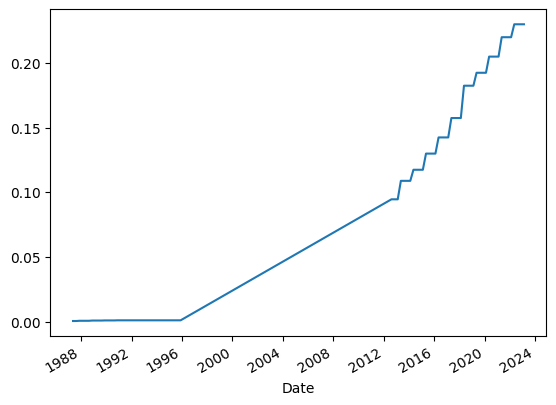

In [148]:
apple.dividends.plot(x = 'data', y = 'open')

In [149]:
apple = yf.Ticker('AAPL')

In [151]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [152]:
import json
with open('apple.json') as json_file:
    apple_info = json.load(json_file)
    
apple_info

FileNotFoundError: [Errno 2] No such file or directory: 'apple.json'

In [154]:
!pip install bs4

In [155]:
!pip install html5lib

In [156]:
!pip install lxml

In [157]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [158]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"

In [159]:
data = requests.get(url).text

In [161]:
soup = BeautifulSoup(data, 'html.parser')

In [162]:
netflix_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
    # Finally we append the data of each row to the table
    netflix_data = netflix_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)    

In [163]:
netflix_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,"78,560,600",528.21
1,"May 01, 2021",512.65,518.95,478.54,502.81,"66,927,600",502.81
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,"111,573,300",513.47
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,"90,183,900",521.66
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,"61,902,300",538.85


In [164]:
NF = pd.read_html(url)

In [166]:
NFDF = NF[0]
NFDF.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,528.21,78560600
1,"May 01, 2021",512.65,518.95,478.54,502.81,502.81,66927600
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,513.47,111573300
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,521.66,90183900
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,538.85,61902300


In [167]:
html_data = requests.get('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/amazon_data_webpage.html')

In [168]:
bSoup = BeautifulSoup(html_data, 'html.parser')

TypeError: object of type 'Response' has no len()

In [169]:
amzn = pd.read_html('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/amazon_data_webpage.html')

In [171]:
amzn.head()

AttributeError: 'list' object has no attribute 'head'